In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## clustering
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [21]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [22]:
relog = pd.read_csv('/content/gdrive/MyDrive/dataset/relog_1.csv')
relog

,Unnamed: 0,user_id,timestamp,event,user_id_cnt,user_id_day_cnt,first_event
0,0,1,2022-05-03 14:52:28,11-11-2-8-11,5,2,GetCreditInfo
1,1,7,2022-05-22 16:39:49,11,1,1,GetCreditInfo
2,2,9,2022-05-21 23:37:58,11-11-11,3,1,GetCreditInfo
3,3,11,2022-03-24 10:53:59,1-11-8-11-9-6-5-4-7-11-8-8-1-11-8-5-4-7-11-8-8...,43,4,EndLoanApply
4,4,12,2022-03-14 01:13:11,1-2-6-5-4-7-7-7-1-2-6-5-4-7-7-7-1-2-6-5-4-7-7-...,120,14,EndLoanApply
...,...,...,...,...,...,...,...
584631,584631,879693,2022-05-13 11:29:49,6-5-4-7-1-7-6-1-8-11-6-7-1-6-5-4-6-5-4-6-7-7-7...,61,8,EndLoanApply
584632,584632,879694,2022-03-31 20:07:23,6-5-4-7-7-7,6,1,EndLoanApply
584633,584633,879695,2022-05-27 12:48:32,6-5-4-7,4,1,EndLoanApply
584634,584634,879696,2022-03-14 05:35:34,2-8-11-11-8-11-1-2-5-4-7,11,1,EndLoanApply


In [23]:
relog = relog.drop(['Unnamed: 0'], axis = 1)

In [24]:
relog.isnull().sum()

user_id            0
timestamp          0
event              0
user_id_cnt        0
user_id_day_cnt    0
first_event        0
dtype: int64

In [25]:
!pip install KMeans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 첫행동 컬럼을 원핫인코딩하고 군집화

In [26]:
relog_final = relog[['user_id_cnt','user_id_day_cnt','first_event']]

In [27]:
relog_final

,user_id_cnt,user_id_day_cnt,first_event
0,5,2,GetCreditInfo
1,1,1,GetCreditInfo
2,3,1,GetCreditInfo
3,43,4,EndLoanApply
4,120,14,EndLoanApply
...,...,...,...
584631,61,8,EndLoanApply
584632,6,1,EndLoanApply
584633,4,1,EndLoanApply
584634,11,1,EndLoanApply


In [28]:
relog_final = pd.get_dummies(relog_final)
relog_final

,user_id_cnt,user_id_day_cnt,first_event_EndLoanApply,first_event_GetCreditInfo,first_event_UseDSRCalc,first_event_UseLoanManage,first_event_others
0,5,2,0,1,0,0,0
1,1,1,0,1,0,0,0
2,3,1,0,1,0,0,0
3,43,4,1,0,0,0,0
4,120,14,1,0,0,0,0
...,...,...,...,...,...,...,...
584631,61,8,1,0,0,0,0
584632,6,1,1,0,0,0,0
584633,4,1,1,0,0,0,0
584634,11,1,1,0,0,0,0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

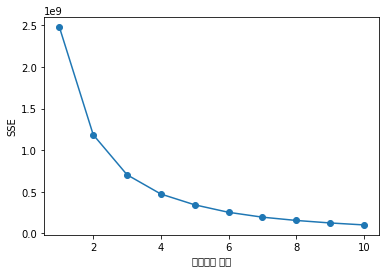

In [29]:
def elbow(X):
  sse = []
  for i in range(1,11):  
    km = KMeans(n_clusters=i, init='k-means++', random_state = 0)
    km.fit(X)
    sse.append(km.inertia_)
  
  plt.plot(range(1,11), sse, marker ='o')
  plt.xlabel('클러스터 개수')
  plt.ylabel('SSE')
  plt.show()

elbow(relog_final)

최적의 군집의수 4개로 결정

In [42]:
model = KMeans(n_clusters=6)
model.fit(relog_final)

KMeans(n_clusters=6)

In [43]:
print (model.inertia_)

758163724.5888951


군집한거 시각화

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(relog_final)

relog_final['pca_x'] = pca_transformed[:,0]
relog_final['pca_y'] = pca_transformed[:,1]
relog_final.head(3)

,user_id_cnt,user_id_day_cnt,first_event_EndLoanApply,first_event_GetCreditInfo,first_event_UseDSRCalc,first_event_UseLoanManage,first_event_others,pca_x,pca_y,cluster
0,5,2,0,1,0,0,0,-44.448620,0.570547,0
1,1,1,0,1,0,0,0,-51.506169,1.657158,0
2,3,1,0,1,0,0,0,-48.056714,1.975162,0


In [47]:
relog_final['cluster']=model.labels_

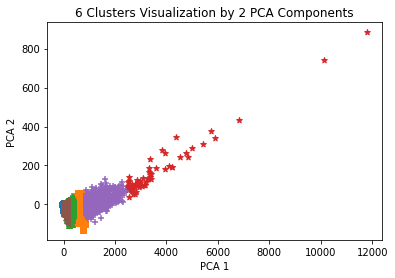

In [49]:
marker0_ind = relog_final[relog_final['cluster']==0].index
marker1_ind = relog_final[relog_final['cluster']==1].index
marker2_ind = relog_final[relog_final['cluster']==2].index
marker3_ind = relog_final[relog_final['cluster']==3].index
marker4_ind = relog_final[relog_final['cluster']==4].index
marker5_ind = relog_final[relog_final['cluster']==5].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=relog_final.loc[marker0_ind,'pca_x'], y=relog_final.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=relog_final.loc[marker1_ind,'pca_x'], y=relog_final.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=relog_final.loc[marker2_ind,'pca_x'], y=relog_final.loc[marker2_ind,'pca_y'], marker='^')
plt.scatter(x=relog_final.loc[marker3_ind,'pca_x'], y=relog_final.loc[marker3_ind,'pca_y'], marker='*')
plt.scatter(x=relog_final.loc[marker4_ind,'pca_x'], y=relog_final.loc[marker4_ind,'pca_y'], marker='+')
plt.scatter(x=relog_final.loc[marker5_ind,'pca_x'], y=relog_final.loc[marker5_ind,'pca_y'], marker='<')


plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('6 Clusters Visualization by 2 PCA Components')
plt.show()